**Run everything under Preprocessing and modeling the data, filtration filter, and making the feature matrix first. Then come up and run the load data sub section.**

## Import Packages 

In [1]:
import numpy as np
import math
import pandas as pd
import statistics
import os
import scipy
from statistics import median
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing 
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats, integrate
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix 
from sklearn.svm import SVC 
import seaborn as sns
%matplotlib inline

#### **Initiate ONLY ONCE before running time windows**


<font color='red'>Final scores will reset if you run this through each time window iteration</font>

In [586]:
#create data_frame
scores_df = pd.DataFrame(columns = ['Time Window (sec)', 'SVM', 'K-NN', 'Random Forest']) 

#### **Input Desired Parameters Below**

In [700]:
#sliding window size (900 for 30sec)
def window_size():
    return 900;

In [588]:
#overlap of sliding window = 20% of sliding window
def overlap(w_s):
    return int(.8 * w_s);

In [ ]:
def sliding_window():
    return 5;

In [ ]:
def peak_threshold():
    #changed from 32
    return 20;

In [ ]:
def threshold_radius():
    #changed from 50
    return 40

## Load Data

<font color='red'>change file names accordingly</font> 

In [707]:
#loops through folder and gets each file then directs to main
directory = os.fsencode("./interpolatedFiles")

w_s = window_size()
ovl = overlap(w_s)
s_w = sliding_window()
p_t = peak_threshold()
t_r = threshold_radius()


feat_matrix_key= [['id', 'activity', 'sacc mean', 'sacc var', 'sacc std', 'sacc-up', 'sacc-up-right', 'sacc-right', 'sacc-down-right', 'sacc-up-down', 'sacc-down-left', 'sacc-left', 'sacc-left-up', 'fixa dura mean', 'fixa dura var', 'fixa dura std', 'fixa rate', 'slope', 'dispersion mean', 'fixation count']]
feat_matrix = []

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"): 
        eyedata_file = './interpolatedFiles/%s' % filename
        eye_data = pd.read_csv(eyedata_file, encoding = "utf-8")
        rawdata = np.asarray(eye_data)

        #sliding window 
        data_id = 0
        name = filename[4:-4]
        i=0
        for i in range (0,len(rawdata), i+ovl):
            start_ind = i
            end_ind = start_ind + w_s
            sliced_pd = eye_data.iloc[start_ind:end_ind]
            sliced_np = rawdata[start_ind:end_ind, :]
            main(sliced_pd, sliced_np, s_w, p_t, t_r, data_id, name, start_ind)
            data_id +=1 
    else:
        continue

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


In [708]:
feat_df = pd.DataFrame(feat_matrix)
feat_df.columns = ['id', 'activity', 'sacc mean', 'sacc var', 'sacc std', 'sacc-up', 'sacc-up-right', 'sacc-right', 'sacc-down-right', 'sacc-up-down', 'sacc-down-left', 'sacc-left', 'sacc-left-up', 'fixa dura mean', 'fixa dura var', 'fixa dura std', 'fixa rate', 'slope', 'dispersion mean', 'fixation count']
#fill na with mean
feat_df.fillna(feat_df.mean(), inplace=True)
feat_df.drop(['id'], axis=1, inplace=True)

In [709]:
scores_df = model_main(feat_df, scores_df)

In [710]:
scores_df

,Time Window (sec),SVM,K-NN,Random Forest
0,30.0,0.459321,0.379095,0.458435
1,30.0,0.455835,0.399369,0.459772
2,30.0,0.474988,0.396216,0.466646
3,30.0,0.482053,0.399022,0.472824
4,30.0,0.494347,0.419658,0.487356
5,45.0,0.524899,0.441763,0.508375
6,45.0,0.509506,0.426370,0.504935


### One Case Test

**Only run this if you need to test a single file to tweak code**

In [380]:
def testing(eye_data, rawdata, sliding_window, peak_threshold, threshold_radius, data_id, activity_name, start_ind):
    fixations = get_fixations(rawdata, sliding_window, peak_threshold, threshold_radius)
    fixind_array = fix_indicate(rawdata, fixations)
    fix_array = make_fixarray(eye_data, fixind_array, start_ind)
    #feat_array = make_featarray(fix_array, sliding_window, data_id, activity_name)
    return fix_array

In [381]:
def testing(eye_data, rawdata, sliding_window, peak_threshold, threshold_radius, data_id, activity_name, start_ind):
    fixations = get_fixations(rawdata, sliding_window, peak_threshold, threshold_radius)
    fixind_array = fix_indicate(rawdata, fixations)
    fix_array = make_fixarray(eye_data, fixind_array, start_ind)
    feat_array = make_featarray(fix_array, sliding_window, data_id, activity_name)
    return feat_array

In [26]:
#one act, one participant

test = []
# load data (just one file)
name = "P09_READ.csv"
eyedata_file = './interpolatedFiles/%s' % name
eye_data = pd.read_csv(eyedata_file, encoding = "utf-8")
data_id = 0
name = filename[4:-4]
rawdata = np.asarray(eye_data)

#x, y = rawdata.T
#plt.scatter(x,y)
#plt.show()

i=0
for i in range (0,len(rawdata), i+ovl):
    start_ind = i
    end_ind = start_ind + w_s
    sliced_pd = eye_data.iloc[start_ind:end_ind]
    sliced_np = rawdata[start_ind:end_ind, :]
    fix_arr = testing(sliced_pd, sliced_np, 5, 32, 50, data_id, name, start_ind)
    fix_arr = np.asarray(fix_arr)
    fix_arr = fix_arr[:, 0:2]
    x,y = fix_arr.T
    plt.scatter(x,y)
    plt.show()
    
    x,y = sliced_np.T
    plt.scatter(x,y)
    plt.show()
    data_id +=1 
    break

IndexError: too many indices for array

## Preprocessing Data

### Create Dummy Variables

In [663]:
def preprocess_df(feat_df):
    #factorize df
    obj_df_pre = feat_df.copy()
    factor = pd.factorize(obj_df_pre['activity'])
    obj_df_pre.activity = factor[0]
    definitions = factor[1]

    return obj_df_pre

In [664]:
def make_matrix(obj_df_pre):
    interp_feat_matrix = np.asarray(obj_df_pre)
    return interp_feat_matrix

In [665]:
def starndardize_df(obj_df_pre):
    #standardize df
    scaler = MinMaxScaler() 
    obj_df = scaler.fit_transform(obj_df_pre)
    return obj_df

In [666]:
def standardize_feat(features):
    Standardisation = preprocessing.StandardScaler() 
  
    # Scaled feature 
    feat_std = Standardisation.fit_transform(features) 
        
    return feat_std

### Training & Testing Data

In [667]:
def get_feat_lab(obj_df, interp_feat_matrix):
    
    #split training and testing data
    labels = []
    features = []

    for featarr in interp_feat_matrix:
        labels.append(featarr[0])
        features.append(featarr[1:])

    np.asarray(labels)
    np.asarray(features)
    
    #standardize features
    Standardisation = preprocessing.StandardScaler() 
    # Scaled feature 
    feat_std = Standardisation.fit_transform(features) 

    features_arr = np.asarray(feat_std)
    labels_arr = np.asarray(labels)
    
    return [features_arr, labels_arr]

    #x is features, y is labels
   # X_train, X_test, y_train, y_test = train_test_split(feat_std, labels, test_size = 0.2, random_state = 0)

## Modeling the Data

### Initialize Models

In [668]:
# create random forest model
def create_forest():
    forest_model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = None)
    return forest_model

In [669]:
# create svm model
def create_svm():
    #Create a svm Classifier
    svm_model = svm.SVC(gamma = 'auto', kernel='rbf', C = 10) # rbf Kernel
    return svm_model

In [670]:
# create knn model
def create_knn():
    #create Knn model
    knn_model = KNeighborsClassifier(n_neighbors=3)
    return knn_model

### Fit Models Using Cross Validation

In [671]:
#fit models using StratifiedKfold Cross validation and retrieve F1-score averaged over 10 folds
def fit_models(feat_lab, forest_model, svm_model, knn_model):
    scores_forest = []
    scores_svm = []
    scores_knn = []
    
    features_arr = feat_lab[0]
    labels_arr = feat_lab[1]

    skf = StratifiedKFold(n_splits=10)
    skf.get_n_splits(features_arr, labels_arr)

    #StratifiedKFold(n_splits=10, random_state=None, shuffle=True)
    for train_index, test_index in skf.split(features_arr, labels_arr):
        X_train, X_test = features_arr[train_index], features_arr[test_index]
        y_train, y_test = labels_arr[train_index], labels_arr[test_index]

        # Train the model using the training sets
        forest_model.fit(X_train,y_train)
        svm_model.fit(X_train,y_train)
        knn_model.fit(X_train,y_train)

        #Predict Output
        forest_pred = forest_model.predict(X_test)
        svm_pred = svm_model.predict(X_test)
        knn_pred= knn_model.predict(X_test)


        #get f1 score
        scores_forest.append(metrics.f1_score(y_test, forest_pred, average='micro'))
        scores_svm.append(metrics.f1_score(y_test, svm_pred, average='micro'))
        scores_knn.append(metrics.f1_score(y_test, knn_pred, average='micro'))
        
    avg_score_forest = statistics.mean(scores_forest)
    avg_score_svm = statistics.mean(scores_svm)
    avg_score_knn = statistics.mean(scores_knn)
    
    return [window_size()/30, avg_score_svm, avg_score_knn, avg_score_forest]

### Reporting F-1 Score

In [672]:
def model_main(feat_df, scores_df):
    
    #preprocess 
    obj_df_pre = preprocess_df(feat_df)
    interp_feat_matrix =  make_matrix(obj_df_pre)
    # feat_std = standardize_feat(features)
    obj_df = starndardize_df(obj_df_pre)
    
    #get features and labels
    feat_lab = get_feat_lab(obj_df, interp_feat_matrix)
    
    #create models
    forest_model = create_forest()
    svm_model = create_svm()
    knn_model = create_knn()
    
    #fit models using cross validation
    new_row = fit_models(feat_lab, forest_model, svm_model, knn_model)
    
    #append row
    scores_df.loc[len(scores_df)] = new_row
    
    return scores_df

In [673]:
scores_df

,Time Window (sec),SVM,K-NN,Random Forest
0,30.0,0.459321,0.379095,0.458435


### Random Forest

#### Fitting Model

In [552]:
#create and fit random forest model
forest_model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = None)
forest_model.fit(X_train, y_train) 

# Predicting the Test set results
forest_pred = forest_model.predict(X_test)

In [372]:
# model accuracy for X_test   
accuracy = forest_model.score(X_test, y_test)
print("Accuracy: ", accuracy)

# creating a confusion matrix 
cm = confusion_matrix(y_test, forest_pred) 
print(cm)

report = metrics.classification_report(y_test, forest_pred, digits=3)
print(report)

Accuracy:  0.47105788423153694
[[38  0  0 11  3  1  8  4]
 [ 0 58  0  2  3  1  2  3]
 [ 4  0 24  1 11 11  9  2]
 [13  2  0 31  0  1  4  9]
 [ 1  2 20  7 16  6  3  4]
 [ 2  4 11  5  7 29  6  4]
 [11  2  7  1 13  4 19  6]
 [ 8  5  0 13  0  1  7 21]]
              precision    recall  f1-score   support

         0.0      0.494     0.585     0.535        65
         1.0      0.795     0.841     0.817        69
         2.0      0.387     0.387     0.387        62
         3.0      0.437     0.517     0.473        60
         4.0      0.302     0.271     0.286        59
         5.0      0.537     0.426     0.475        68
         6.0      0.328     0.302     0.314        63
         7.0      0.396     0.382     0.389        55

    accuracy                          0.471       501
   macro avg      0.459     0.464     0.460       501
weighted avg      0.467     0.471     0.467       501



#### Cross Validation

In [553]:
scores_forest = []

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(features_arr, labels_arr)

#StratifiedKFold(n_splits=10, random_state=None, shuffle=True)
for train_index, test_index in skf.split(features_arr, labels_arr):
    X_train, X_test = features_arr[train_index], features_arr[test_index]
    y_train, y_test = labels_arr[train_index], labels_arr[test_index]
    
    # Train the model using the training sets
    forest_model.fit(X_train,y_train)

    #Predict Output
    forest_pred = forest_model.predict(X_test)
    
    #get f1 score
    scores_forest.append(metrics.f1_score(y_test, forest_pred, average='micro'))
    
print(scores_forest)

[0.32861635220125784, 0.3160377358490566, 0.3380503144654088, 0.3113207547169811, 0.29874213836477986, 0.36163522012578614, 0.3333333333333333, 0.2908805031446541, 0.2861685214626391, 0.2893481717011129]


In [554]:
avg_score_forest = statistics.mean(scores_forest)
print(avg_score_forest)

0.31541330453650096


#### Feature Importance

In [564]:
#feature importance
importances = forest_model.feature_importances_
indices = np.argsort(importances)
print(importances)
print(indices)

[0.07651354 0.04873618 0.05250687 0.01696586 0.01509562 0.02591457
 0.01656175 0.02224101 0.01754898 0.0272308  0.01604907 0.10924233
 0.09378449 0.0924319  0.05177735 0.09779458 0.16782786 0.05177724]
[ 4 10  6  3  8  7  5  9  1 17 14  2  0 13 12 15 11 16]


In [565]:
#assign importance value to each feature
feat_by_impt = {}

i = 0
for ind in indices:
    feat = feat_df.columns[ind+1]
    feat_by_impt[feat] = importances[i]
    i+=1
feat_by_impt = {k: v for k, v in sorted(feat_by_impt.items(), key=lambda item: item[1], reverse = True)}

featlist_impt = list(feat_by_impt.keys())
indices_desc = list(feat_by_impt.values())

Text(0.5, 0, 'Relative Importance')

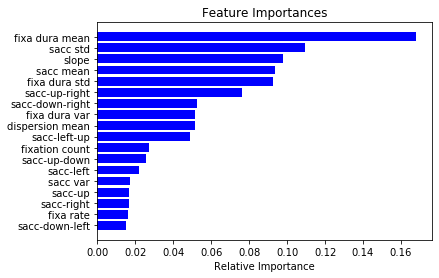

In [566]:
#plot important features
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
y_pos = np.arange(len(featlist_impt))
y_pos = np.flip(y_pos)
plt.yticks(y_pos, featlist_impt)
plt.xlabel('Relative Importance')

### SVM

#### Fitting Model

In [555]:
#Create a svm Classifier
svm_model = svm.SVC(gamma = 'auto', kernel='rbf', C = 10) # Linear Kernel

#Train the model using the training sets
svm_model.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm_model.predict(X_test)

In [ ]:
# model accuracy for X_test   
accuracy = svm_model.score(X_test, y_test)
print("Accuracy: ", accuracy)

# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_pred) 
print(cm)

report = metrics.classification_report(y_test, svm_pred, digits=3)
print(report)

#### Cross Validation

In [556]:
scores_svm = []

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(features_arr, labels_arr)

#StratifiedKFold(n_splits=10, random_state=None, shuffle=True)
for train_index, test_index in skf.split(features_arr, labels_arr):
    X_train, X_test = features_arr[train_index], features_arr[test_index]
    y_train, y_test = labels_arr[train_index], labels_arr[test_index]
    
    # Train the model using the training sets
    svm_model.fit(X_train,y_train)

    #Predict Output
    svm_pred = svm_model.predict(X_test)
    
    #get f1 score
    scores_svm.append(metrics.f1_score(y_test, svm_pred, average='micro'))
    
print(scores_svm)

[0.3050314465408805, 0.32075471698113206, 0.3380503144654088, 0.30974842767295596, 0.27672955974842767, 0.3694968553459119, 0.3411949685534591, 0.32075471698113206, 0.31001589825119236, 0.35135135135135137]


In [557]:
avg_score_svm = statistics.mean(scores_svm)

### K-NN

#### Fitting Model

In [558]:
#create Knn model
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn_model.fit(X_train,y_train)

#Predict Output
knn_pred= knn_model.predict(X_test)

In [ ]:
# model accuracy for X_test   
accuracy = knn_model.score(X_test, y_test)
print("Accuracy: ", accuracy)

# creating a confusion matrix 
cm = confusion_matrix(y_test, knn_pred) 
print(cm)

report = metrics.classification_report(y_test, knn_pred, digits=3)
print(report)

#### Cross Validation

In [559]:
scores_knn = []

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(features_arr, labels_arr)

#StratifiedKFold(n_splits=10, random_state=None, shuffle=True)
for train_index, test_index in skf.split(features_arr, labels_arr):
    X_train, X_test = features_arr[train_index], features_arr[test_index]
    y_train, y_test = labels_arr[train_index], labels_arr[test_index]
    
    # Train the model using the training sets
    knn_model.fit(X_train,y_train)

    #Predict Output
    knn_pred= knn_model.predict(X_test)
    
    #get f1 score
    scores_knn.append(metrics.f1_score(y_test, knn_pred, average='micro'))
    
print(scores_knn)

[0.2688679245283019, 0.2610062893081761, 0.2830188679245283, 0.25471698113207547, 0.2358490566037736, 0.2940251572327044, 0.26572327044025157, 0.25, 0.2480127186009539, 0.2575516693163752]


In [560]:
avg_score_knn = statistics.mean(scores_knn)

## Filtration Filter

In [1]:
#creating 1D difference vector 
#m(after) - m(before) = difference in means of sliding windows
#r = length of sliding windows

#input is the array of x, y, exists & value of sliding window
def difference_vector(eye_array, r): 
    
    diff_vector = []
    
    #run through each array 
    for n in range(r, (len(eye_array) - r - 1)):
        
        m_before_x = 0
        m_before_y = 0
        m_after_x = 0
        m_after_y = 0
    
        
        for i in range(1, r):
            #m_before is the avg of r (sliding window) values 
            try:
                m_before_x += eye_array[n-i][0]/r
                m_before_y += eye_array[n-i][1]/r
                m_after_x += eye_array[n+i][0]/r
                m_after_y += eye_array[n+i][1]/r
            except:
                continue
            
        diff_eq = math.sqrt((m_after_x - m_before_x)**2 + (m_after_y - m_before_y)**2)
        
        diff_vector.append(diff_eq)
        
    return np.asarray(diff_vector)

In [2]:
#input the difference vector
#all peaks are detected with diff_vector
#find values higher than preceding and following sample
def find_peaks(diff_vector):
    
    shape = np.shape(diff_vector)
    size_diffvect = shape[0]

    #peak vector is same size as raw data. initialized as 0. just input values at indices with peaks
    peak = [0] * size_diffvect
    
    #running through difference vector and inserting diff value if greater than point before and after
    for n in range(0, size_diffvect-1):
        if diff_vector[n] > diff_vector[n-1] and diff_vector[n] > diff_vector[n+1]:
            peak[n] = diff_vector[n]
            
    return np.asarray(peak)

In [3]:
#r is sliding window
#if more than one peak is found within a window of r values, highest peak kept
def remove_close_peaks(peak_vector, r):

    result_vect = peak_vector
    
    for n in range(r, result_vect.size - r - 1):
        #if there is a peak at that index
        if result_vect[n] != 0:
            #run through that sliding window of peaks
            for i in range(n-r, n-1):
                #keep peak only if it is higher than selected peak
                if result_vect[i] < result_vect[n]:
                    result_vect[i] = 0
            for i in range(n+1, n+r):
                if result_vect[i] < result_vect[n]:
                    result_vect[i] = 0
                
    return result_vect

In [4]:
#add indices of peaks taller than given threshold in peak vector to a list
def find_peak_indices(peak_vector, threshold):
    peak_indices = []
    
    shape = np.shape(peak_vector)
    size_peakvect = shape[0]

    for n in range(0, size_peakvect-1):
        if (peak_vector[n] > threshold):
            peak_indices.append(n)
            
    return peak_indices

In [5]:
#estimate positions of fixations using median and join fixations that spatially close together given threshold
#done iteratively... starting with fixations with shortest intermediate distance
#inputs: peak indices & fixation
#i am assuming that I don't have a fixation list? not sure if they do 
def estimate_fixations(peak_indices, rawdata, threshold_radius):
    
    res_indices = peak_indices.copy()

    #initialize very negative so that it enters while loop
    shortestdist = -9999999

    #stops when there are no more distances shorter than threshold
    while (shortestdist < threshold_radius): 
        #initialize fixation estimate array
        fix_est = []

        #add median estimate to fixation list. use all raw data sam
         
        #getting length
        #go through range of peak indices. in one iteration, going from peak(n-1) to peak(1)
        #(n=0 is spot for first peak index)
        for n in range(1, len(res_indices) -1):
            #x and y array that will later be used to compute median
            fix_x_est = []
            fix_y_est = []
            
            #finding actual index (indexing to peak index which represents place in raw data x and y position of peak)
            for i in range(res_indices[n-1], res_indices[n]):
                #append the x and y data points to be used for fixation median
                fix_x_est.append(rawdata[i][0])
                fix_y_est.append(rawdata[i][1])
                
            #this is median estimate of fixaiton but taking all points of peak range (peak(n-1) to peak(n))
            fix_x_med = median(fix_x_est)
            fix_y_med = median(fix_y_est)
            
            #it should be appending just 
            #append to fixation estimate 2d array
            fix_est.append((fix_x_med, fix_y_med))
            
        fixest_array = np.asarray(fix_est)
        
        
        #set shortest distance to inf
        shortestdist = float('inf')
        #calculate distance as euclidean norm bw current and previous fixation estimate. 
        #if shorter than current shortest distance, mark it as shortest and remember index
        

        for n in range(1, len(fixest_array) -1):
            x_curr = fixest_array[n][0]
            x_prev = fixest_array[n-1][0]
            y_curr = fixest_array[n][1]
            y_prev = fixest_array[n-1][1]
            
            eucl_dist = math.sqrt((x_curr - x_prev)**2 + (y_curr - y_prev)**2)
           
            if eucl_dist < shortestdist:
                shortestdist = eucl_dist
                
                #n is the index in which the distance is smaller than the shortest distance... 
                #we're going to want to remove
                index = n     
                
            #if shortest intermediate distance bw 2 fixations is shorter than threshold radius
            #remove peak separating them, during next iteration they will be joined together
        if shortestdist < threshold_radius:
            del res_indices[index]
    
    #returning the peak_indices that have too short of distance bw
    return(res_indices)
    
       

In [6]:
#retrieve fixation estimates 
#returns array with fixation indices (in form of peaks)
def get_fixations(rawdata, sliding_window, peak_threshold, threshold_radius):
    diff_vector = difference_vector(rawdata, sliding_window)
    peaks = find_peaks(diff_vector)
    fixed_peaks = remove_close_peaks(peaks, sliding_window)
    peak_ind = find_peak_indices(peaks, peak_threshold)
    fixations = estimate_fixations(peak_ind, rawdata, threshold_radius)
    return fixations

In [7]:
#create boolean array to indiciate if a given point is a fixation
def fix_indicate(rawdata, fixations): 
    fixind_arr = []
    for i in range(0, len(rawdata)):
        if i in fixations:
            fixind_arr.append(True)
        else: 
            fixind_arr.append(False)
    return fixind_arr

In [8]:
#create array of x,y points of just fixation points
def make_fixarray(eye_data, fixind_array, start_ind):

    #copy of data frame
    df_features = eye_data.copy()
    df_features.reset_index(inplace=True)

    #calculate times and put it into an array
    currtime = 33 * start_ind
    times = []
    for index, row in df_features.iterrows():
        times.append(currtime)
        currtime += 33
    timesarr = np.asarray(times)
    
    #add column of timestamp
    df_features1 = pd.concat([df_features, pd.DataFrame(timesarr), pd.DataFrame(fixind_array)], axis=1)

    
    df_features1.columns = ['id', 'x', 'y', 'timestamp', 'fixation_bool']

   
    #filter df to get only fixation points
    fixation_df = df_features1[(df_features1['fixation_bool'] == True)]
    fixation_df = fixation_df.filter(['x', 'y', 'timestamp'])
    
    #array of just fixation peaks, timestamp, and boolean
    fix_array = np.asarray(fixation_df)
    
    
    return np.asarray(fix_array)

## Create Feature Matrix

In [9]:
#2d array holding each data set's features
#one array is one data set 

def main(eye_data, rawdata, sliding_window, peak_threshold, threshold_radius, data_id, activity_name, start_ind):
    fixations = get_fixations(rawdata, sliding_window, peak_threshold, threshold_radius)
    fixind_array = fix_indicate(rawdata, fixations)
    fix_array = make_fixarray(eye_data, fixind_array, start_ind)
    feat_array = make_featarray(fix_array, sliding_window, data_id, activity_name)
    feat_matrix.append(feat_array)
      

In [12]:
#create array of all features for model
def make_featarray(fix_array, r, data_id, activity_name):
    
    res = {}
    
    res.update({"id": data_id, "activity": name})
   
    #array of mean, var, std of saccade size
    saccsize_arr = sacc_size(fix_array, r)
    saccsize_mean = saccsize_arr[0]
    saccsize_var = saccsize_arr[1]
    saccsize_std = saccsize_arr[2]
    res.update({"sacc mean": saccsize_mean, "sacc var": saccsize_var, "sacc std": saccsize_std})
    
    #dictionary of counts of basic directions
    directions = sacc_dir(fix_array, r)
    compass_brackets = ["sacc-up", "sacc-up-right", "sacc-right", "sacc-down-right", "sacc-up-down", "sacc-down-left", "sacc-left", "sacc-up-left", "sacc-up"]
    res.update(directions)
    
    #array of mean, var, std of fixation duration
    fixdura_arr = fix_dura(fix_array)
    fixdura_mean = fixdura_arr[0]
    fixdura_var = fixdura_arr[1]
    fixdura_std = fixdura_arr[2]
    res.update({"fixa dura mean" : fixdura_mean,"fixa dura var" : fixdura_var, "fixa dura std": fixdura_std})
    
    #int value of fixation rate
    fixat_rate = fixa_rate(fix_array)
    res.update({"fixa rate": fixat_rate})
    
    #int value of fixation slope
    slope_feat = slope(fix_array)
    res.update({"slope" : slope_feat})
    
    #int value of mean of dispersion area distances
    disparea_mean = disp_area(fix_array)
    res.update({"dispersion mean" : disparea_mean})
    
    #int value of number of fixations
    fix_countret = fix_count(fix_array)
    res.update({"fixation count" :fix_countret})
    
    return list(res.values())


## Features for Prediction Model

### Saccade Size

In [13]:
#creating 1D difference vector 
#m(after) - m(before) = difference in means of sliding windows
#r = length of sliding windows

#input is the array of x and y & value of sliding window
#returns saccade mean, std_dev, var
def sacc_size(fix_array, r): 
        
    fixsize_vect = []
     
    #run through array
    for n in range(r, (len(fix_array) - r - 1)):
        
        m_before_x = 0
        m_before_y = 0
        m_after_x = 0
        m_after_y = 0
            
        for i in range(1, r):
            #m_before is the avg of r (sliding window) values 
            try:
                m_before_x += fix_array[n-i, 0]/r
                m_before_y += fix_array[n-i, 1]/r
                m_after_x += fix_array[n+i,0]/r
                m_after_y += fix_array[n+i, 1]/r
            except:
                continue
 
        diff_eq = math.sqrt((m_after_x - m_before_x)**2 + (m_after_y - m_before_y)**2)
        
        fixsize_vect.append(diff_eq)
        
    fixsize_vect = np.asarray(fixsize_vect)
        
    #ret mean,var,std of fix sizes
    sacc_mean = np.mean(fixsize_vect)
    sacc_var = np.var(fixsize_vect)
    sacc_std = np.std(fixsize_vect)
    
    return [sacc_mean, sacc_var, sacc_std]

### Saccade Direction

In [14]:
def sacc_dir(fix_array,r):
    
    dir_dict = {"sacc-up":0, "sacc-up-right":0, "sacc-right":0, "sacc-down-right":0, "sacc-up-down": 0, "sacc-down-left":0, "sacc-left":0, "sacc-left-up":0}
    compass_brackets = ["sacc-up", "sacc-up-right", "sacc-right", "sacc-down-right", "sacc-up-down", "sacc-down-left", "sacc-left", "sacc-left-up", "sacc-up"]
    dir_arr = []
    
    #loop through sliding window of fixation array
    for n in range(r, (len(fix_array) - r - 1)):

        m_before_x = 0
        m_before_y = 0
        m_after_x = 0
        m_after_y = 0

        #find the mean coordinates of the sliding window
        for i in range(1, r):
            #m_before is the avg of r (sliding window) values 
            try:
                m_before_x += fix_array[n-i, 0]/r
                m_before_y += fix_array[n-i, 1]/r
                m_after_x += fix_array[n+i,0]/r
                m_after_y += fix_array[n+i, 1]/r
            except:
                continue
        
        #difference between before and after means
        deltaX = m_after_x - m_before_x
        deltaY = m_after_y - m_before_y
    
        #calculating angle/direction on unit circle
        degrees_temp = math.atan2(deltaX, deltaY)/math.pi*180

        if degrees_temp<0:
            degrees_final = 360 + degrees_temp
        else:
            degrees_final = degrees_temp
    
        #find index of which direction based on number (like hashing) cooresponding to compass brackets
        if (math.isnan(degrees_final)):
                continue
        else:
            compass_lookup = round(degrees_final/45)
            direction = compass_brackets[compass_lookup]

            #increase count of direction
            dir_dict[direction] +=1
            dir_arr.append(direction)

    return dir_dict

In [15]:
def sacc_compl_dir(dir_arr, compass_brackets):
    
    compl_dict = {"follow-saccade": 0, "neighbouring-saccade": 0, "opposite-saccade": 0}
    
    #loop through array of directions (ordered by time)
    for i in range(1,len(dir_arr)):
        
        curr = dir_arr[i]
        prev = dir_arr[i-1]
        
        #index of saccade direction
        curr_dirind= compass_brackets.index(curr)
        prev_dirind= compass_brackets.index(prev)

        ind_diff = abs(curr_dirind-prev_dirind)
        
        #opposite
        if (ind_diff == 4):
            compl_dict["opposite-saccade"] +=1
        
        #neighboring
        if (ind_diff == 1):
            compl_dict["neighbouring-saccade"] +=1
        
        #following
        if (curr == prev):
            compl_dict["follow-saccade"] +=1
            
    return (compl_dict)

### Fixation Duration

In [16]:
#returns fixation duration mean, variance, and standard deviation
def fix_dura(fix_array):
    time_array = []
    
    #loop through array of fixations
    for i in range(1,len(fix_array)):
        #get current and previous time stamps (of peaks)
        #fixation is in between
        
        time_curr = fix_array[i, 2]
        time_prev = fix_array[i-1, 2]
        
        time_diff = time_curr-time_prev
        time_array.append(time_diff)
    
    #returns array of all fixation durations
    time_array = np.asarray(time_array)
        
    dura_mean = np.mean(time_array)
    dura_var = np.var(time_array)
    dura_std = np.std(time_array)
                
    return [dura_mean, dura_var, dura_std]

### Fixation Rate

In [17]:
#number of fixations over 1000 ms (1s)
#count fixations per second
def fixa_rate(fix_array): 
    return len(fix_array)/1000

### Fixation Slope

In [509]:
#returns slope of x,y lin reg plot
#def slope(fixation_df):
def slope(fix_array):

    try:
        Xs = fix_array[0]
        Ys = fix_array[1]

        #slope equation
        slope = (((np.mean(Xs) * np.mean(Ys)) - np.mean(Xs*Ys)) / ((np.mean(Xs)**2) - np.mean(Xs**2)))

        return slope
    except:
        return float('nan')
    

### Fixation Dispersion Area

In [511]:
#creating 1D difference vector 
#m(after) - m(before) = difference in means of sliding windows
#r = length of sliding windows

#input is the array of x and y & value of sliding window
def disp_area(fix_array): 
    try:
        meanx = np.mean(fix_array, axis=0)[0]
        meany = np.mean(fix_array, axis=0)[1]

        disp_full = []

        #run through array
        for n in range(0, (len(fix_array)-1)):
            currx = fix_array[n, 0]
            curry = fix_array[n, 1]
            diff_eq = math.sqrt((meanx - currx)**2 + (meany - curry)**2)

            disp_full.append([diff_eq])

        #entire array of dispersion distances
        disp_full = np.asarray(disp_full)

        #array of x,y,dist
        out_arr = fix_array.copy()
        out_arr = np.append(out_arr[:len(disp_full)], disp_full, 1)
        #sort by distance in increasing order
        out_arr = out_arr[out_arr[:,3].argsort()]
        #disp_full = disp_full.sort(axis=1)

        #find how many is 75% of data
        outliers = int(.75 * len(fix_array))

        #should be first 75% of data with shortest distance from mean
        adjusted = out_arr[:][0:outliers+1]

        #repeat steps with adjusted mean

        #new mean using adjusted data
        newmeanx = np.mean(adjusted, axis=0)[0]
        newmeany = np.mean(adjusted, axis=0)[1]

        disp_adj = []

        #run through array
        for n in range(0, (len(adjusted)-1)):
            currx = adjusted[n, 0]
            curry = adjusted[n, 1]
            diff_eq = math.sqrt((newmeanx - currx)**2 + (newmeany - curry)**2)

            disp_adj.append(diff_eq)

        #get the area of the distances 
        #max,min y max min y

        return np.mean(disp_adj)
    except: 
        return float('nan')


### Fixation count

In [512]:
#returns number of fixations
def fix_count(fix_array):
    try:
        shape = np.shape(fix_array)
        size_data = shape[0]
        return size_data
    except: 
        return float('nan')